In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
hashtags_df = pd.read_csv("/content/hashtags.csv")

In [ ]:
# Extract the hashtags
hashtags = hashtags_df['hashtag'].tolist()


In [ ]:
# Vectorize the hashtags using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(hashtags)


In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
hashtags_df['dbscan_cluster'] = dbscan.fit_predict(X)


In [ ]:
# Filter out noise points
filtered_df = hashtags_df[hashtags_df['dbscan_cluster'] != -1]


In [ ]:
# Group hashtags by their DBSCAN cluster
clustered_hashtags = filtered_df.groupby('dbscan_cluster')['hashtag'].apply(list)


In [ ]:
# Create a label for each cluster by selecting the most frequent hashtag in each cluster
cluster_labels = clustered_hashtags.apply(lambda x: max(set(x), key=x.count))


In [ ]:
# Create a dictionary to map cluster numbers to labels
cluster_label_dict = cluster_labels.to_dict()

# Map the cluster labels to the dataframe
filtered_df['cluster_label'] = filtered_df['dbscan_cluster'].map(cluster_label_dict)


<ipython-input-9-260919906fe2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster_label'] = filtered_df['dbscan_cluster'].map(cluster_label_dict)


In [ ]:
# Count the number of hashtags in each cluster
cluster_counts = filtered_df['cluster_label'].value_counts()

# Convert to a dataframe for easy plotting
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Count']

# Filter the top 10 clusters based on count
top_clusters_df = cluster_counts_df.nlargest(10, 'Count')


<ipython-input-11-7452426b47d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_clusters_df, x='Cluster', y='Count', palette='viridis')
<ipython-input-11-7452426b47d9>:12: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from current font.
  plt.tight_layout()
<ipython-input-11-7452426b47d9>:12: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-11-7452426b47d9>:12: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from current font.
  plt.tight_layout()
<ipython-input-11-7452426b47d9>:12: UserWarning: Glyph 2330 (\N{DEVANAGARI LETTER CA}) missing from current font.
  plt.tight_layout()
<ipython-input-11-7452426b47d9>:12: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  plt.tight_layout()
<ipython-input-11-7452426b47d9>:12

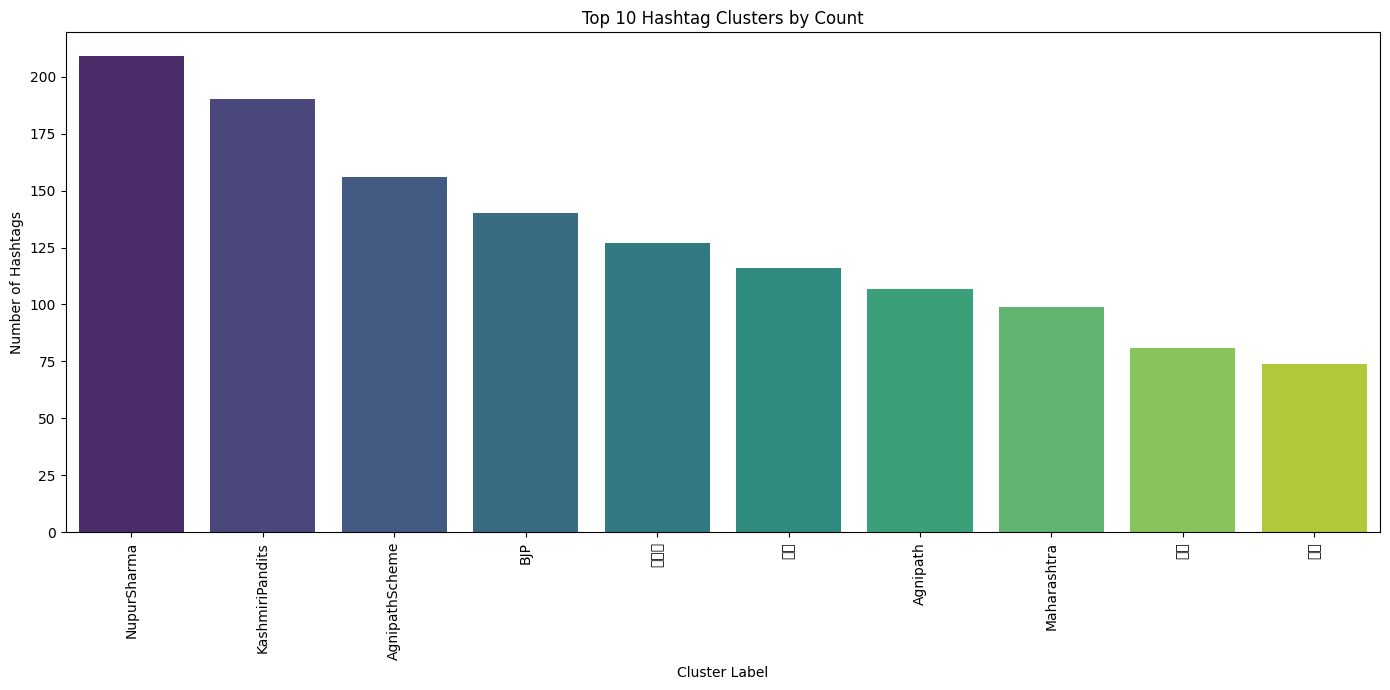

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 7))

# Bar plot
sns.barplot(data=top_clusters_df, x='Cluster', y='Count', palette='viridis')
plt.title('Top 10 Hashtag Clusters by Count')
plt.xticks(rotation=90)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Hashtags')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:

# Create a new dataframe with the cluster labels and their frequencies
# Assuming cluster_labels is now a list, we need to create a range for index
cluster_labels_df = pd.DataFrame({'Cluster Label': range(len(cluster_labels)),
                                  'Frequency': cluster_labels})

# Sort the dataframe by frequency
cluster_labels_df = cluster_labels_df.sort_values(by=['Frequency'], ascending=False)

# Print the dataframe as a table
print(cluster_labels_df.to_string(index=False))

 Cluster Label                       Frequency
             9                             ॐ_ह
           293                             ॐ_स
           400                             ॐ_श
           714                            ॐ_मह
           214                             ॐ_भ
            78                            ॐ_नम
           371                             ॐ_ग
           463                          हरहरमह
           330                        हर_हर_मह
           166                           हर_हर
           825                       हर__हर_मह
           700                   हर____हर___मह
            76                              हन
           248                             समल
           186                              सम
            13                              सन
           672                              सद
           346                              सत
           647                              शन
           637                             लवज
           10